In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/MyDrive/Phase_Retrieval/classification_over_measurements/utils")

Mounted at /content/gdrive


In [2]:
from LoadData import get_datos
from FinalModel import CLASSIFICATION_MODEL,CLASSIFICATION_MODEL_with_back,CLASSIFICATION_MODEL_with_initialization
from FinalModel import ejemplo_backpropagation, ejemplo_inicializacion
import tensorflow as tf
import matplotlib.pyplot as plt
from CallBacks import callback_test_clasification
from scipy.io import loadmat
#from loss_and_metrics import F1_score


In [3]:
#@title Parámetros

SHAPE = (128,128)
BATCH_SIZE =16
NUM_MEASUREMENTS = 1
NUM_CLASSES = 10

dataset = "mnist" # mnist - fashion_mnist - cifar10
initialization = "backpropagation" # None - backpropagation - FSI

In [4]:
train_images, test_images = get_datos(name_dataset = dataset, batch_size=BATCH_SIZE, tam = SHAPE, num_clases=NUM_CLASSES)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
x_train,y_train = next(iter(train_images))

In [6]:
x = loadmat(os.path.join("..", "Data_4_Lab","Toy_Object.mat"))["x"]
x = tf.cast(x, tf.complex128)
#x_abs = tf.math.divide(x, tf.cast(tf.reduce_max(tf.math.abs(x)), tf.complex128))
#mins = tf.math.reduce_min(tf.math.angle(x))
#maxs = tf.math.reduce_max(tf.math.angle(x))
#x_angle = tf.math.divide(tf.math.subtract(tf.math.angle(x),mins),tf.math.subtract(maxs,mins))
#print(tf.math.reduce_min(x_angle), tf.math.reduce_max(x_angle))
#x = tf.multiply(x_abs, tf.math.exp(tf.multiply(tf.cast(x_angle, tf.complex128), tf.constant(1j, dtype=tf.complex128))))
x = tf.expand_dims(x,-1)
x_train2 = tf.concat([tf.math.real(x), tf.math.imag(x)], axis = -1)
x_train2 = tf.expand_dims(x_train2,0)

In [7]:
#x_train = x_train2
indx = 
x = tf.complex(x_train[1,...,0],x_train[1,...,1])

In [8]:
x_train.shape

TensorShape([16, 128, 128, 2])

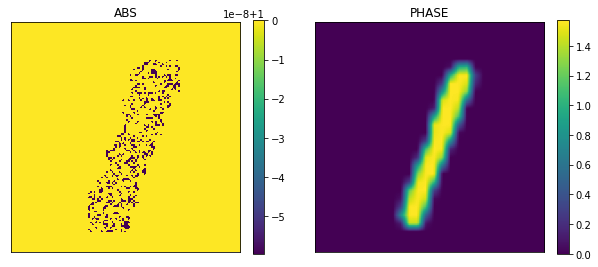

In [9]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(tf.math.abs(x)); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("ABS")
a = axs[1].imshow(tf.math.angle(x)); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("PHASE")
fig.show()

In [10]:
back_propagation = ejemplo_backpropagation(shape=SHAPE, L = NUM_MEASUREMENTS,  archivo_sftf_solver = "SFTF_solver_LAB_simul.mat", snr=100)
inicializacion = ejemplo_inicializacion(shape=SHAPE, L = NUM_MEASUREMENTS, archivo_sftf = "SFTF_LAB_simul.mat",  archivo_sftf_solver = "SFTF_solver_LAB_simul.mat", snr=100)
back_propagation.build((BATCH_SIZE, *SHAPE, 2))
inicializacion.build((BATCH_SIZE, *SHAPE, 2))

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [11]:
output = back_propagation(x_train)
muestras_back, back_real, back_imag, back_abs, back_ang = tf.unstack(output, num=5, axis=-1)
output = inicializacion(x_train)
muestras_init, init_real, init_imag, init_abs, init_ang = tf.unstack(output, num=5, axis=-1)

InvalidArgumentError: ignored

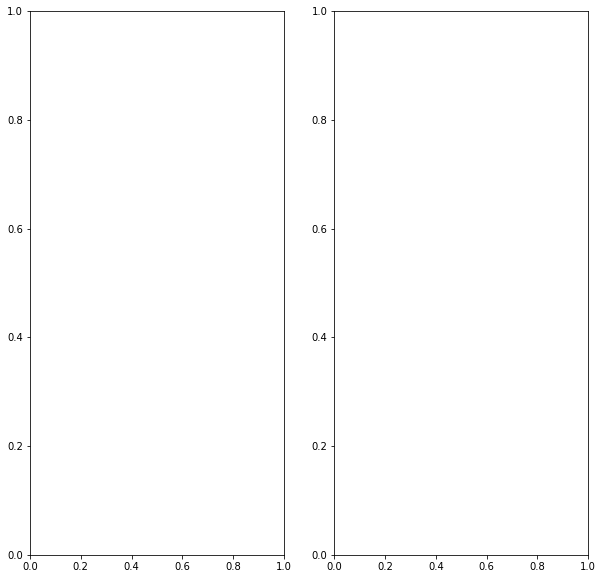

In [36]:
indx = 16
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(x_train[indx,...,0]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("REAL")
a = axs[1].imshow(x_train[indx,...,1]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("IMAG")
fig.show()

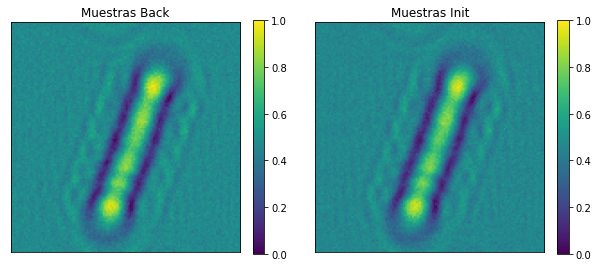

In [13]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(muestras_back[1,...]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("Muestras Back")
a = axs[1].imshow(muestras_init[1,...]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("Muestras Init")
fig.show()

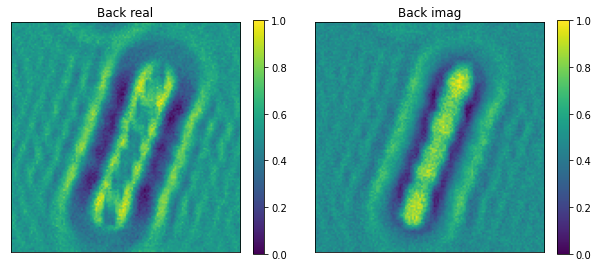

In [14]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(back_real[1,...]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("Back real")
a = axs[1].imshow(back_imag[1,...]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("Back imag")
fig.show()

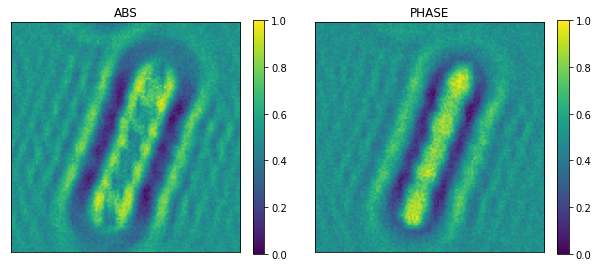

In [15]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(back_abs[1,]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("ABS")
a = axs[1].imshow(back_ang[1,]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("PHASE")
fig.show()

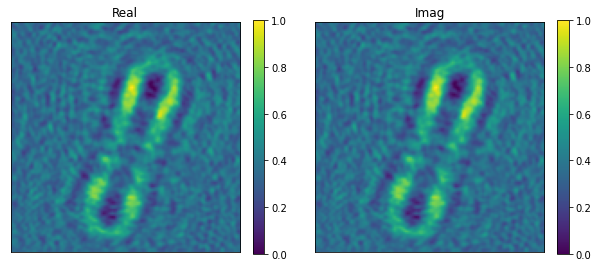

In [16]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(init_real[1,]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("Real")
a = axs[1].imshow(init_real[1,]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("Imag")
fig.show()

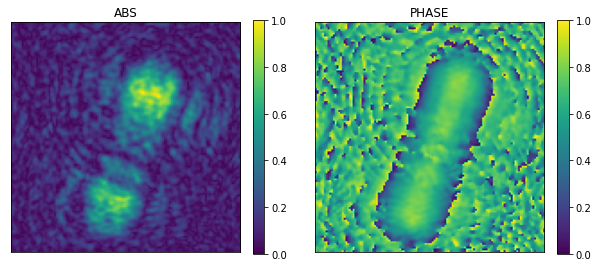

In [17]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
a = axs[0].imshow(init_abs[1,]); plt.sca(axs[0]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[0],fraction=0.046)
axs[0].set_title("ABS")
a = axs[1].imshow(init_ang[1,]); plt.sca(axs[1]); plt.yticks([]); plt.xticks([])
fig.colorbar(a, ax=axs[1],fraction=0.046)
axs[1].set_title("PHASE")
fig.show()